In [162]:
# Imports and utility functions
import sympy
import numpy as np
from sympy import nsolve, pi, E, log, S, latex, Float
from sympy.abc import x
from sympy.physics.units import percent, K, hbar, nm, V, eV, electron_rest_mass, meter, kg, second, K, boltzmann_constant, cm, planck, elementary_charge, coulomb, mm, um,ohm, A,us, ms, vacuum_permittivity
from sympy.physics.units import convert_to
from sympy import sin, cos, sqrt, sinh, cosh
from sympy.plotting import plot
from sympy import integrate

from sympy.physics.units import Quantity
from IPython.display import Markdown as md
from matplotlib import pyplot as plt

def latex_units(expr, units):
    if units == 1:
        return latex(Float(simplify(expr), 3))
    return latex(Float(simplify(expr / units), 3)) + " " + latex(units)

def unit(expr):
    try:
        return expr.as_coeff_Mul()[1]
    except:
        return 1

def simplify(expr):
    return convert_to(expr, [kg, meter, second, K, coulomb]).evalf(50)
    
def symbool(expr):
    return bool(convert_to(expr, [kg, meter, second, K, coulomb]))
def without_units(x_units, y_units):
    def wrapper(f):
        def f_(x):
            return simplify(f(x * x_units) / y_units)
        return f_
    return wrapper

def plot_this(x_min, x_max, y_units, num = 100):
    def wrapper(f):
        x_units = unit(x_min)
        f_ = lambda x: simplify(f(x * x_units) / y_units)

        x = np.linspace(float(x_min/x_units), float(x_max/x_units), num)
        y = np.array([f_(x_) for x_ in x])

        plt.plot(x, y)
        print(latex(x_units))
        plt.xlabel(f"${latex(x_units).replace('//', '////')}$")
        plt.ylabel(latex(y_units))
        return f
    return wrapper

In [128]:
# Problem 1
def v_built_in(N_D, N_A, T):
    thermal_voltage = boltzmann_constant * T / elementary_charge
    return thermal_voltage * log(N_A * N_D / n_i_gaas**2)


n_i_gaas = 1.79e6 / cm**3
N_D = 10**16 / cm**3
N_A = 4 * 10**16 / cm**3
V_bi = v_built_in(N_D, N_A, 300 * K)
    

In [129]:
def solve_problem (applied_voltage):
    thermal_voltage = boltzmann_constant * 300 * K / elementary_charge
    electrons_in_p = N_D * E**(-(V_bi-applied_voltage) / thermal_voltage)
    holes_in_n = N_A * E**(-(V_bi- applied_voltage) / thermal_voltage)
    return f"| ${latex_units(applied_voltage, V)}$ | ${latex_units(electrons_in_p, 1 / cm**3)}$ | ${latex_units(holes_in_n, 1 / cm**3)}$|"

display(md(f"""
**Problem 1**
| Applied voltage | Electron concentration in p-type | Hole concentration in n-type |
| --- | --- | --- |
{solve_problem(0.9 * V)}
{solve_problem(1.10 * V)}
{solve_problem(-0.95 * V)}
"""))


**Problem 1**
| Applied voltage | Electron concentration in p-type | Hole concentration in n-type |
| --- | --- | --- |
| $0.9 \text{V}$ | $1.05 \cdot 10^{11} \frac{1}{\text{cm}^{3}}$ | $4.22 \cdot 10^{11} \frac{1}{\text{cm}^{3}}$|
| $1.1 \text{V}$ | $2.41 \cdot 10^{14} \frac{1}{\text{cm}^{3}}$ | $9.66 \cdot 10^{14} \frac{1}{\text{cm}^{3}}$|
| $-0.95 \text{V}$ | $8.8 \cdot 10^{-21} \frac{1}{\text{cm}^{3}}$ | $3.52 \cdot 10^{-20} \frac{1}{\text{cm}^{3}}$|


In [130]:
# Problem 2

T = 300 * K
area = 10 ** -4 * cm**2
# n region
N_D = 10**17 / cm**3
p_lifetime_n = 10**-7 * second
n_mobility_n = 850 * cm**2 / (V * second)
p_mobility_n = 320 * cm**2 / (V * second)

# p region
N_A = 5 * 10**15 / cm**3
n_lifetime_p = 10**-6 * second
n_mobility_p = 1250 * cm**2 / (V * second)
p_mobility_p = 420 * cm**2 / (V * second)

# si properties (https://www.pveducation.org/es/fotovoltaica/materials/general-properties-of-silicon)
N_C = 3 * 10**19 / cm**3
N_V = 1 * 10**19 / cm**3
n_i_si = 1 * 10**10 / cm**3
e_r = 11.7 # also K_s (relative permittivity)
V_g = 1.1 * V

m_e = 1.18 * electron_rest_mass
m_h = 0.81 * electron_rest_mass


In [131]:
def v_built_in(N_D, N_A, T):
    thermal_voltage = boltzmann_constant * T / elementary_charge
    return thermal_voltage * log(N_A * N_D / n_i_si**2)

V_bi = v_built_in(N_D, N_A, T)

permittivity_coeff = e_r*vacuum_permittivity/elementary_charge
# length of depletion region in p region & n region
x_n = simplify((2*permittivity_coeff*(N_A)/(N_D*(N_A+N_D))*V_bi)**(1/S(2)))
x_p = simplify((2*permittivity_coeff*(N_D)/(N_A*(N_A+N_D))*V_bi)**(1/S(2)))

def rel_v(x):
    if symbool(x < -x_p):
        return 0
    elif symbool(-x_p <= x) and symbool(x < 0):
        return N_A / (2*permittivity_coeff) * (x + x_p)**2
    elif symbool(0 <= x) and symbool(x < x_n):
        return V_bi - N_D / (2*permittivity_coeff) * (x_n - x)**2
    else:
        return V_bi

# conduction band
@without_units(um, V)
def V_c(x):
    return V_g - rel_v(x) 

# valence band
@without_units(um, V)
def V_v(x):
    return -rel_v(x)

# intrinsic fermi level
@without_units(um, V)
def E_F_i(x):
    midgap = V_g/2 - rel_v(x) 
    return midgap - 3/4 * boltzmann_constant * T * log(m_e / m_h) / elementary_charge
    

# quasi fermi level for p-region
E_F_p = -boltzmann_constant * T * log(N_A / N_V)

# quasi fermi level for n-region
E_F_n = boltzmann_constant * T * log(N_D / N_C)
E_F_n += (V_g -V_bi) * elementary_charge # conduction band offset

Text(0, 0.5, '$voltage (V)$')

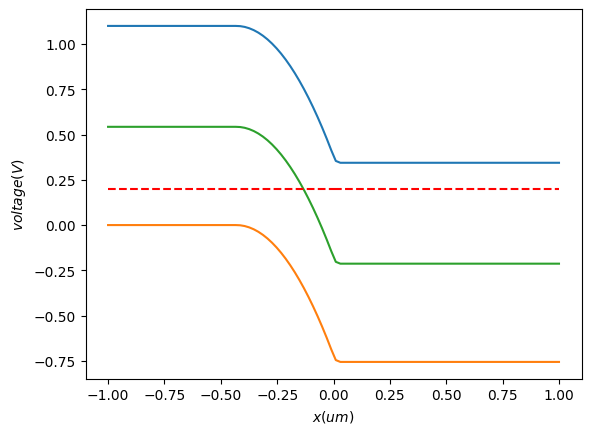

In [132]:
x_min = - 1 # um
x_max = 1
x = np.linspace(x_min , x_max, 100)
y = np.array([V_c(x_) for x_ in x])

plt.plot(x, y)

y = np.array([V_v(x_) for x_ in x])

plt.plot(x, y)

y = np.array([E_F_i(x_) for x_ in x])

plt.plot(x, y)

# draw fermi levels
plt.plot([x_min, 0], [simplify(E_F_p/eV), simplify(E_F_p/eV)], 'r--')
plt.plot([0, x_max], [simplify(E_F_n/eV), simplify(E_F_n/eV)], 'r--')

plt.xlabel("$x (um)$")
plt.ylabel("$voltage (V)$")



In [153]:
p_D_n = boltzmann_constant * T / (elementary_charge) * p_mobility_n
p_length_n = sqrt(p_D_n*p_lifetime_n)

n_D_p = boltzmann_constant * T / (elementary_charge) * n_mobility_p
n_length_p = sqrt(n_D_p*n_lifetime_p)

p_leakage_density_n = elementary_charge * (p_D_n/p_length_n) * n_i_si ** 2 / N_D
n_leakage_density_p = elementary_charge * (n_D_p/n_length_p) * n_i_si ** 2 / N_A
leakage_current = area * (p_leakage_density_n + n_leakage_density_p)

current_0_5V = leakage_current * (E ** (elementary_charge * 0.5 * V/(boltzmann_constant * 300 * K)) - 1)


In [168]:
display(md(f"""
2.b. 

Leakage current:
${latex_units(leakage_current, A)}$

Current at 0.5V:
${latex_units(current_0_5V, A)}$

2.c. 
Assuming no R/G in depletion region so current constant across it:

${latex_units(100*p_leakage_density_n/(p_leakage_density_n+n_leakage_density_p),1)}$%
"""))


2.b. 

Leakage current:
$1.97 \cdot 10^{-15} \text{A}$

Current at 0.5V:
$4.94 \cdot 10^{-7} \text{A}$

2.c. 
Assuming no R/G in depletion region so current constant across it:

$7.41$%
